In [25]:
import pandas as pd

df = pd.read_csv('results_synth_images.csv')

In [26]:
df

,Image Index,Model,Attribution Method,Layer,Metric,Upscale Method,Value
0,0,VGG11,_GradCAMPlusPlus,features.10,roc_auc,ERFUpsamplingFast,0.345574
1,0,VGG11,_GradCAMPlusPlus,features.10,road_combined,ERFUpsamplingFast,-0.015572
2,1,VGG11,_GradCAMPlusPlus,features.10,roc_auc,ERFUpsamplingFast,0.254840
3,1,VGG11,_GradCAMPlusPlus,features.10,road_combined,ERFUpsamplingFast,-0.000258
4,2,VGG11,_GradCAMPlusPlus,features.10,roc_auc,ERFUpsamplingFast,0.321652
...,...,...,...,...,...,...,...
10919,125,VGG11,_DeepLiftShap,features.20,road_combined,SimpleUpsampling,0.000295
10920,126,VGG11,_DeepLiftShap,features.20,roc_auc,SimpleUpsampling,0.849376
10921,126,VGG11,_DeepLiftShap,features.20,road_combined,SimpleUpsampling,0.000094
10922,127,VGG11,_DeepLiftShap,features.20,roc_auc,SimpleUpsampling,0.482139


In [3]:
# Average over image index
attribution_methods = df["Attribution Method"].unique()
layers = df["Layer"].unique()
metrics = df["Metric"].unique()
upscale_methods = df["Upscale Method"].unique()

grouped_df = df.groupby(['Model', 'Attribution Method', 'Layer', 'Metric', 'Upscale Method'])['Value'].mean().reset_index()
#     for upscale_method in upscale_methods:
#         for attribution_method in attribution_methods:
#             for layer in layers:
#                 df_subset = df[(df["Metric"] == metric) & (df["Upscale Method"] == upscale_method) & (df["Attribution Method"] == attribution_method) & (df["Layer"] == layer)]
#                 values = df_subset["Value"].values
#                 print(f"{metric}, {upscale_method}, {attribution_method}, {layer}")
#                 print(values)
#                 # df_subset = df_subset.groupby(["Image Index"]).mean()
#                 print()
#                 break
#             break
#         break
#     break

In [4]:
import sys
sys.path.append('../')

from models import vgg11_PascalVOC
model = vgg11_PascalVOC()

layer_types = {}
types = []
for i, layer in enumerate(layers):
    layer_type = model.features[int(layer.split(".")[-1])].__class__.__name__
    layer_types[layer] = layer_type
    if layer_type not in types:
        types.append(layer_type)

print(types)
print(layer_types)

['MaxPool2d', 'Conv2d', 'ReLU']
{'features.15': 'MaxPool2d', 'features.16': 'Conv2d', 'features.17': 'ReLU', 'features.18': 'Conv2d', 'features.19': 'ReLU', 'features.20': 'MaxPool2d'}


In [5]:
len(attribution_methods) * len(layers) * len(metrics) * len(upscale_methods)

24

In [6]:
# to_plot = grouped_df[grouped_df["Metric"] == "roc_auc"]
# df = to_plot

In [16]:
for attribution_method in attribution_methods:
    for layer in layers:
        for upscale_method in upscale_methods:
            df_subset = to_plot[(to_plot["Attribution Method"] == attribution_method) & (to_plot["Layer"] == layer) & (to_plot["Upscale Method"] == upscale_method)]
            values = df_subset["Value"].values
            print(f"{attribution_method}, {layer}, {upscale_method}")
            print(values)
            print()
            break
        break
    break

_GradCAMPlusPlus, features.10, ERFUpsamplingFast
[0.29027219]



In [17]:
upscale_methods

array(['ERFUpsamplingFast', 'SimpleUpsampling'], dtype=object)

-0.009495548922096683 0.1222953864992616
0.008381281756511882 0.08825064688706806
-0.0044037645496626115 0.11377398238722593
[10, 20, 15] [-0.009495548922096683, 0.008381281756511882, -0.0044037645496626115]
0.004528003369043788 0.09695468452163207
0.02030320498151068 0.09171892552405603
-0.010102440495726606 0.11455235534744988
-0.00794985709825212 0.10907331470693384
[16, 18, 11, 13] [0.004528003369043788, 0.02030320498151068, -0.010102440495726606, -0.00794985709825212]
-0.002506811526131061 0.09935357230069565
0.004782998215142178 0.1003611400390332
-0.011174979471206374 0.12098933904205081
0.00014449688364194437 0.10885080894294114
[17, 19, 12, 14] [-0.002506811526131061, 0.004782998215142178, -0.011174979471206374, 0.00014449688364194437]
-0.01139510825661981 0.1714994140203481
-0.004543617118772585 0.11502213395450765
-0.016657571896792938 0.13773222750394362
[10, 20, 15] [-0.01139510825661981, -0.004543617118772585, -0.016657571896792938]
-0.015772671475175574 0.154705252512872

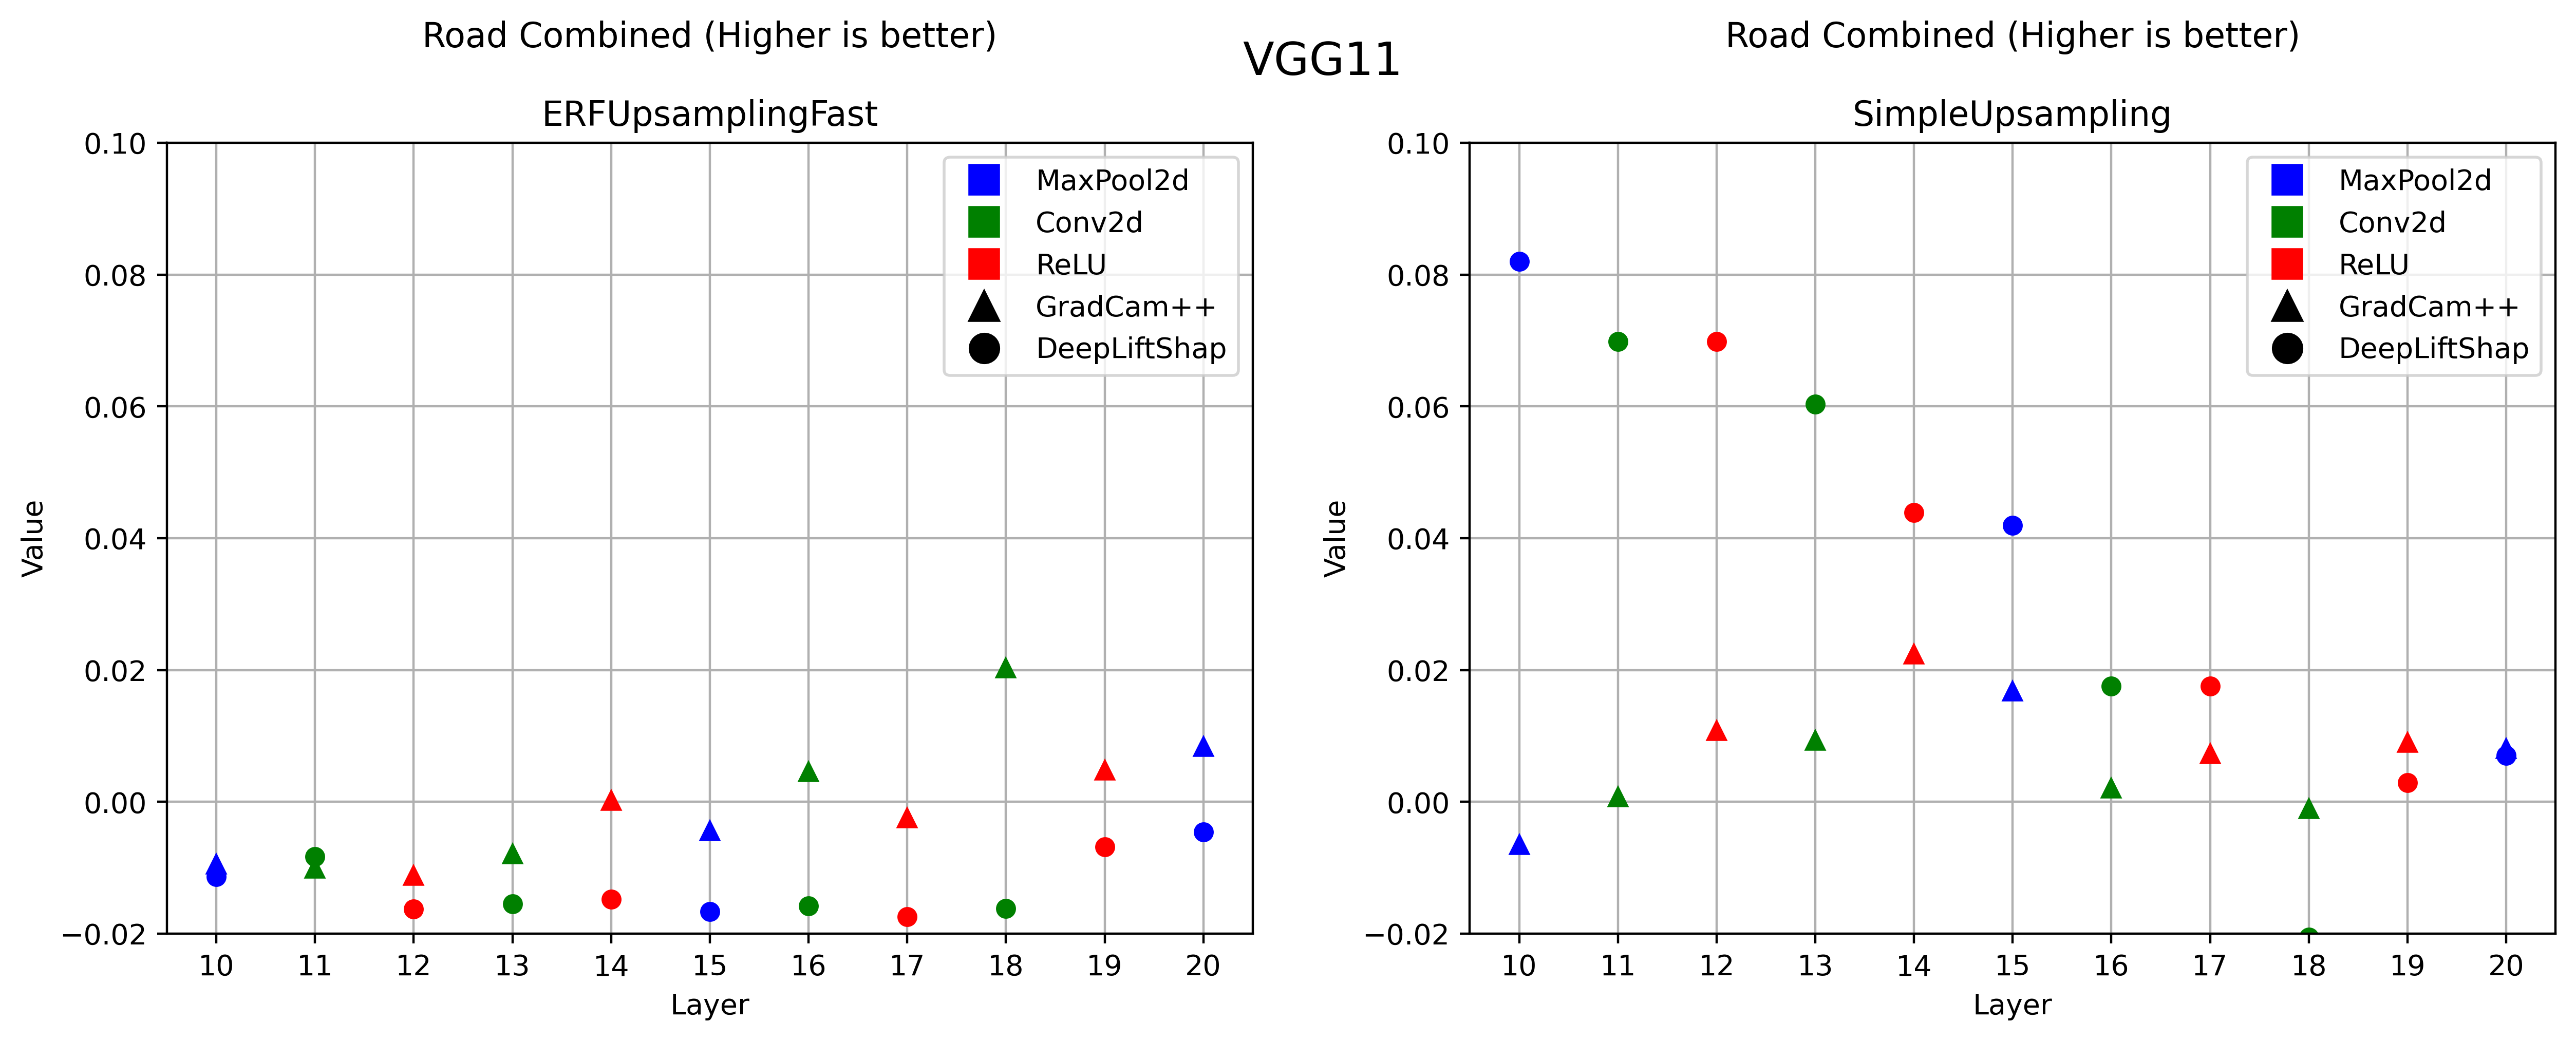

In [33]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

color_for_layers = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
shape_for_methods = {"GradCam++": "^","DeepLiftShap": "o"}  # Define shape mapping
titles = {
    "roc_auc": "ROC AUC (Higher is better)",
    "road_combined": "Road Combined (Higher is better)",
}

fig = plt.figure(figsize=(15,5), dpi=400)


# fig.text(0.05, 0.25, 'ERF Upsampling', ha='center', va='center', fontsize=14) # , fontweight='bold')
# fig.text(0.05, 0.75, 'Bilinear Upsampling', ha='center', va='center', fontsize=14) # , fontweight='bold')

plt.suptitle('VGG11', fontsize=16)
plt.tight_layout()

metric = "road_combined"

for j, upscale in enumerate(upscale_methods):
    plt.subplot(1, 2,j + 1)
    plt.title(titles[metric] + f"\n\n{upscale}")
    for method in attribution_methods:
        for layer_type in types:
            res = df[(df["Attribution Method"] == method) &
                        (df["Metric"] == metric) &
                        (df["Layer"].apply(lambda x: layer_types[x] == layer_type)) &
                        (df["Upscale Method"] == upscale)]
            # print(res.to_numpy().shape)
            # mean = res.to_numpy()
            # print(res)
            indices = res["Layer"].apply(lambda x: int(x.split(".")[-1]))
            indices = list({i for i in indices if i >= 10})
            to_plot = []
            for l in indices:
            # values = [res[res["Layer"] == f"features.{l}"]["Value"].values[0] for l in range(21)]
                values = np.array(res[res["Layer"] == f"features.{l}"]["Value"].values)
                print(values.mean(), values.std())
                to_plot.append(values.mean())

            print(indices, to_plot)

            plt.plot(indices, to_plot,"o" if method == "_DeepLiftShap" else "^", label=layer_type, color=color_for_layers[types.index(layer_type)])
            plt.xlabel("Layer")
            plt.ylabel("Value")
            # Log scale for y
            if metric == "sensitivity":
                plt.yscale("log")

            plt.grid(True)
            plt.ylim([-0.02, 0.1])


    # Create color legend (Layer Types)
    color_legend = [mlines.Line2D([], [], color=color, marker='s', linestyle='None', markersize=10, label=layer) 
                    for color, layer in zip(color_for_layers, types)]

    # Create shape legend (Methods)
    shape_legend = [mlines.Line2D([], [], color='black', marker=shape, linestyle='None', markersize=10, label=method) 
                    for method, shape in shape_for_methods.items()]
    
    plt.xticks(range(10, 21))
    plt.legend(handles=color_legend + shape_legend)

plt.savefig('./plots/results synth road.pdf', dpi=400, bbox_inches='tight')


In [1]:
import pandas as pd

df = pd.read_csv('results erf vs erf fast.csv')

In [2]:
df

,Image Index,Model,Attribution Method,Layer,Metric,Upscale Method,Value
0,-1,VGG11,_GradCAMPlusPlus,features.15,roc_auc,ERFUpsamplingFast,0.436287
1,-1,VGG11,_GradCAMPlusPlus,features.15,roc_auc,ERFUpsampling,0.677518
2,-1,VGG11,_DeepLiftShap,features.15,roc_auc,ERFUpsamplingFast,0.418260
3,-1,VGG11,_DeepLiftShap,features.15,roc_auc,ERFUpsampling,0.728499
4,-1,VGG11,_GradCAMPlusPlus,features.16,roc_auc,ERFUpsamplingFast,0.491613
5,-1,VGG11,_GradCAMPlusPlus,features.16,roc_auc,ERFUpsampling,0.494360
6,-1,VGG11,_DeepLiftShap,features.16,roc_auc,ERFUpsamplingFast,0.441070
7,-1,VGG11,_DeepLiftShap,features.16,roc_auc,ERFUpsampling,0.600407
8,-1,VGG11,_GradCAMPlusPlus,features.17,roc_auc,ERFUpsamplingFast,0.526350
9,-1,VGG11,_GradCAMPlusPlus,features.17,roc_auc,ERFUpsampling,0.616185


In [9]:
upscale_methods

array(['ERFUpsamplingFast', 'ERFUpsampling'], dtype=object)

In [10]:
attribution_methods

array(['_GradCAMPlusPlus', '_DeepLiftShap'], dtype=object)

_GradCAMPlusPlus MaxPool2d roc_auc ERFUpsamplingFast
    Image Index  Model Attribution Method        Layer   Metric  \
0            -1  VGG11   _GradCAMPlusPlus  features.15  roc_auc   
20           -1  VGG11   _GradCAMPlusPlus  features.20  roc_auc   

       Upscale Method     Value  
0   ERFUpsamplingFast  0.436287  
20  ERFUpsamplingFast  0.740726  
0.7407259900577718 0.0
0.4362866054806172 0.0
[20, 15] [0.7407259900577718, 0.4362866054806172]
_GradCAMPlusPlus Conv2d roc_auc ERFUpsamplingFast
    Image Index  Model Attribution Method        Layer   Metric  \
4            -1  VGG11   _GradCAMPlusPlus  features.16  roc_auc   
12           -1  VGG11   _GradCAMPlusPlus  features.18  roc_auc   

       Upscale Method     Value  
4   ERFUpsamplingFast  0.491613  
12  ERFUpsamplingFast  0.640353  
0.4916128100559067 0.0
0.640353161494649 0.0
[16, 18] [0.4916128100559067, 0.640353161494649]
_GradCAMPlusPlus ReLU roc_auc ERFUpsamplingFast
    Image Index  Model Attribution Method        La

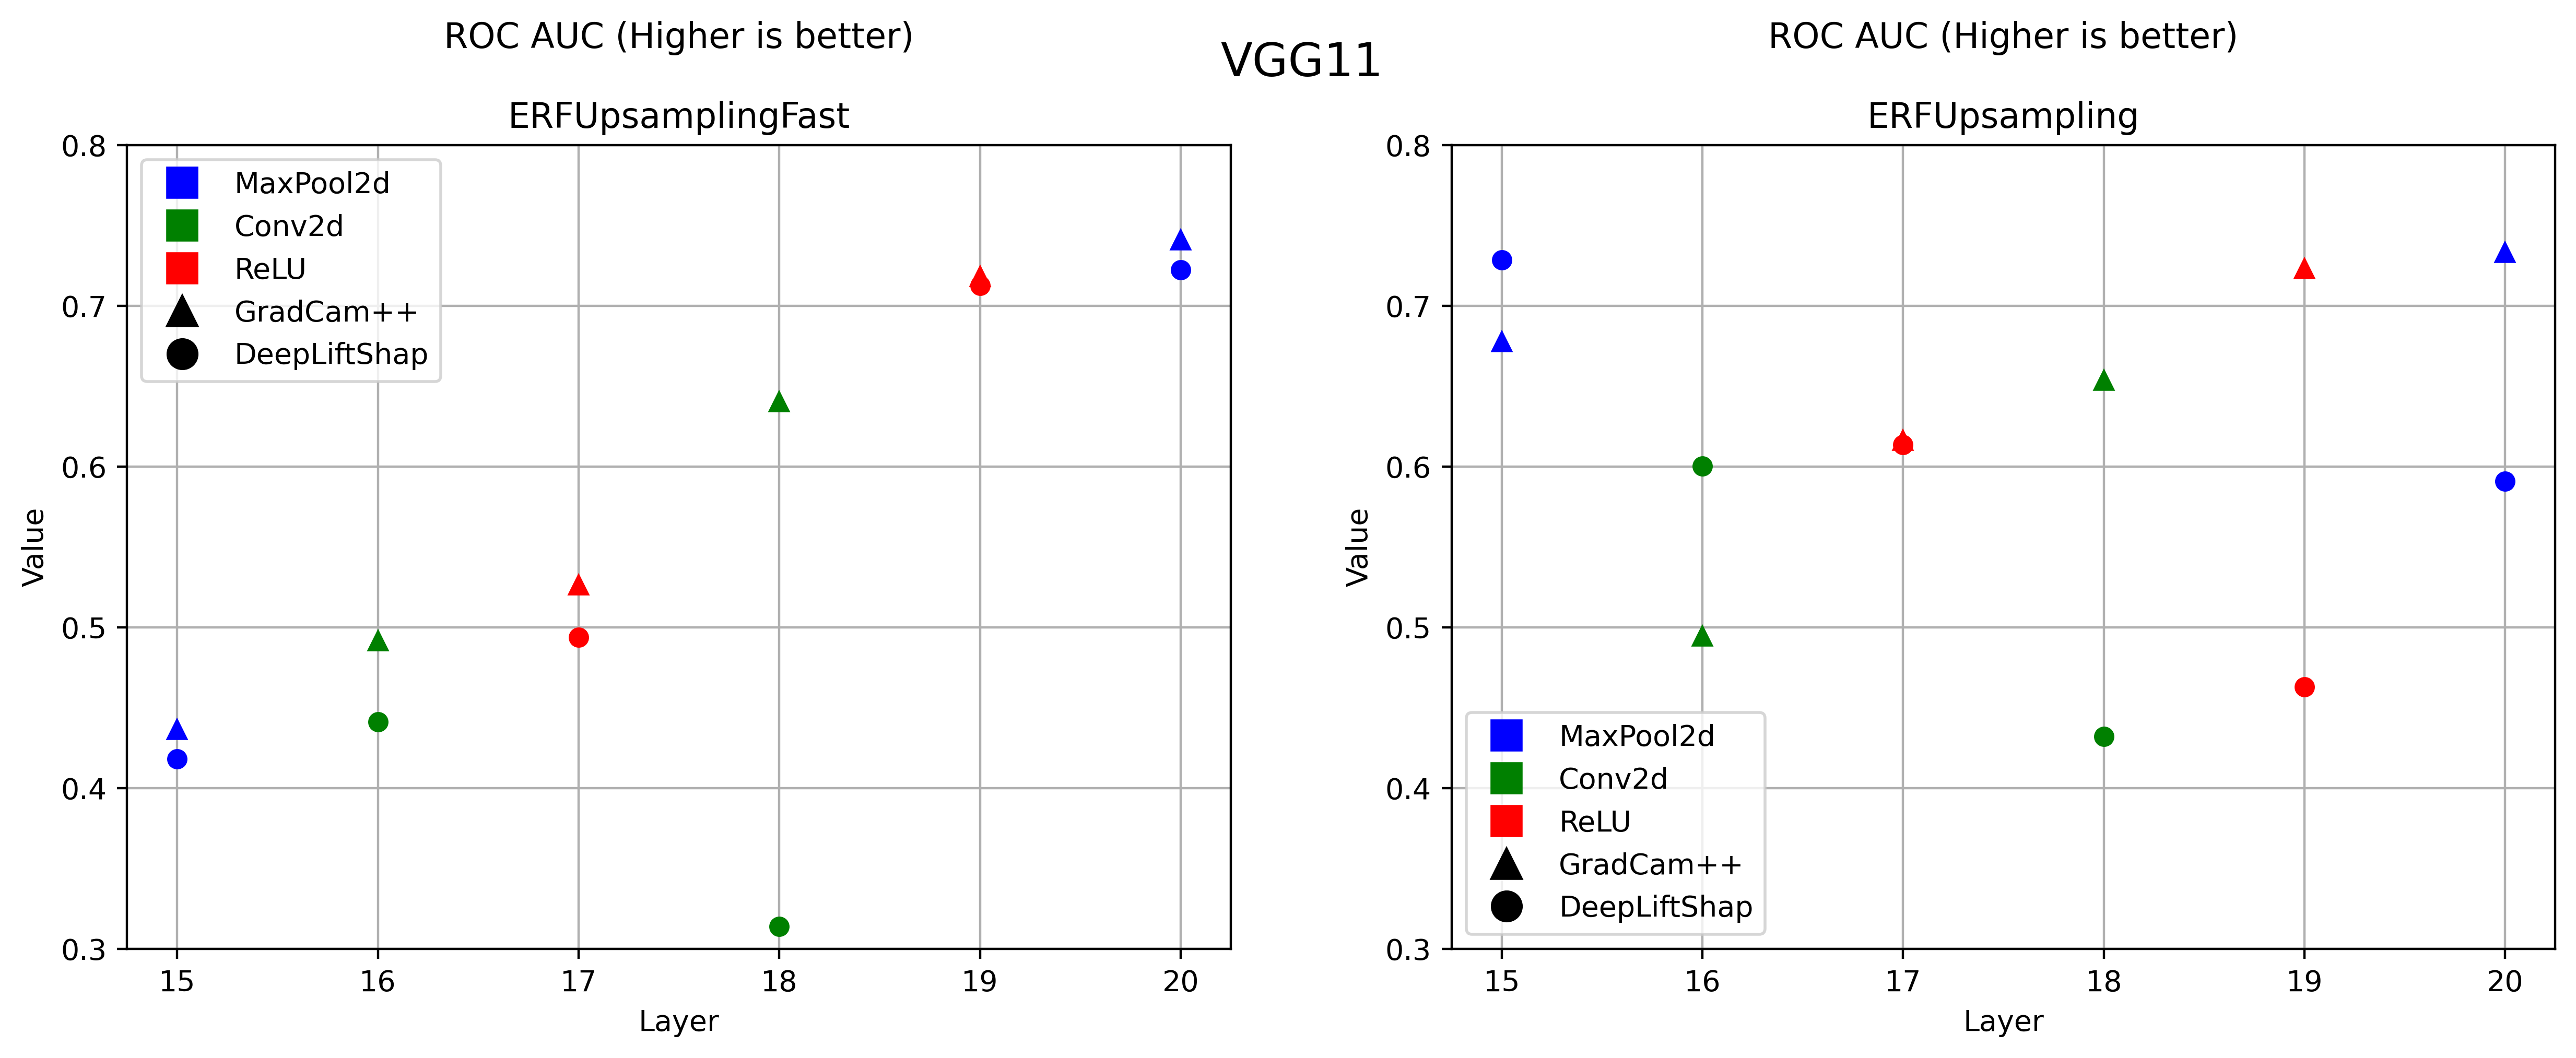

In [16]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

color_for_layers = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
shape_for_methods = {"GradCam++": "^","DeepLiftShap": "o"}  # Define shape mapping
titles = {
    "roc_auc": "ROC AUC (Higher is better)",
    "road_combined": "Road Combined (Higher is better)",
}

fig = plt.figure(figsize=(15,5), dpi=400)


# fig.text(0.05, 0.25, 'ERF Upsampling', ha='center', va='center', fontsize=14) # , fontweight='bold')
# fig.text(0.05, 0.75, 'Bilinear Upsampling', ha='center', va='center', fontsize=14) # , fontweight='bold')

plt.suptitle('VGG11', fontsize=16)
plt.tight_layout()

metric = "roc_auc"

for j, upscale in enumerate(upscale_methods):
    plt.subplot(1, 2,j + 1)
    plt.title(titles[metric] + f"\n\n{upscale}")
    for method in attribution_methods:
        for layer_type in types:
            res = df[(df["Attribution Method"] == method) &
                        (df["Metric"] == metric) &
                        (df["Layer"].apply(lambda x: layer_types[x] == layer_type)) &
                        (df["Upscale Method"] == upscale)]
            print(method, layer_type, metric, upscale)
            # print(res.to_numpy().shape)
            # mean = res.to_numpy()
            # print(res)
            print(res)
            indices = res["Layer"].apply(lambda x: int(x.split(".")[-1]))
            indices = list({i for i in indices if i >= 10})
            to_plot = []
            for l in indices:
            # values = [res[res["Layer"] == f"features.{l}"]["Value"].values[0] for l in range(21)]
                values = np.array(res[res["Layer"] == f"features.{l}"]["Value"].values)
                print(values.mean(), values.std())
                to_plot.append(values.mean())

            print(indices, to_plot)

            plt.plot(indices, to_plot,"o" if method == "_DeepLiftShap" else "^", label=layer_type, color=color_for_layers[types.index(layer_type)])
            plt.xlabel("Layer")
            plt.ylabel("Value")
            # Log scale for y
            if metric == "sensitivity":
                plt.yscale("log")

            plt.grid(True)
            plt.ylim([0.3, 0.8])


    # Create color legend (Layer Types)
    color_legend = [mlines.Line2D([], [], color=color, marker='s', linestyle='None', markersize=10, label=layer) 
                    for color, layer in zip(color_for_layers, types)]

    # Create shape legend (Methods)
    shape_legend = [mlines.Line2D([], [], color='black', marker=shape, linestyle='None', markersize=10, label=method) 
                    for method, shape in shape_for_methods.items()]
    
    plt.xticks(range(15, 21))
    plt.legend(handles=color_legend + shape_legend)

plt.savefig('./plots/results synth erd.pdf', dpi=400, bbox_inches='tight')
